教師なし学習に関して
教師あり学習の場合、正解となるラベルが存在しているが、教師なし学習の場合はそれがない。そのため、似たようなデータをまとめるクラスタリングなどでよく用いられる。例えば顧客のデータが与えられたときに、それを３つのカテゴリーに分類することで、それぞれに適切なアプローチ方法(ダイレクトメール）をとっていくなどがあげられる。

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

In [3]:
data = pd.read_csv("/Users/se-ji/customersdata.csv")

In [4]:
print("サンプルの数：{} 　特徴量の数：{}\n".format(*data.shape))
print("各特徴量の型\n",data.dtypes,"\n")
print("統計量の要約")
display(data.describe())
display(data.head())

サンプルの数：440 　特徴量の数：8

各特徴量の型
 Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object 

統計量の要約


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
#元のデータはdata_originalに格納しておく
data_original = data.copy()

#dataからChannelとRegionの2列を削除するコードを記述
data = data.drop(["Channel","Region"],axis=1)

#消えていることを確認
display(data.head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f30c828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1102c64a8>]], dtype=object)

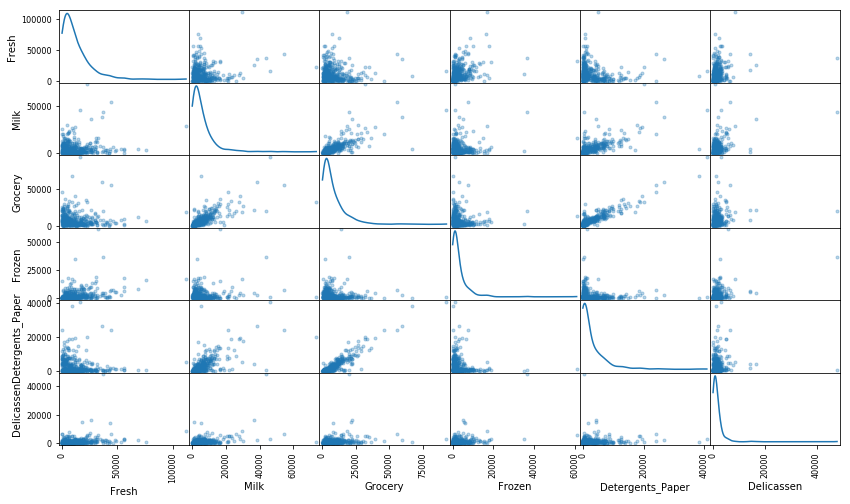

In [6]:
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

In [7]:
#dataに対して適切なFeature Scalingを行うコードを記述
#対数で処理を行う
data_fs = data.apply(np.log)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1118aeeb8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115df0d68>]], dtype=object)

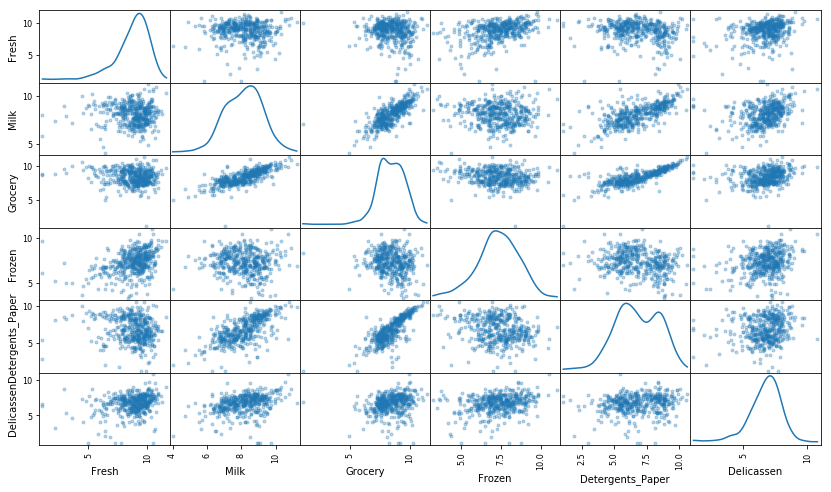

In [8]:
pd.scatter_matrix(data_fs, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

何故フィーチャースケーリングを行う必要があるのか
変数が複数あったときに違うスケールのものが含まれていると、計算するときにそのスケールの違いに大きく左右されてしまうため正確な値が算出できないためそれを補正する必要があるから。

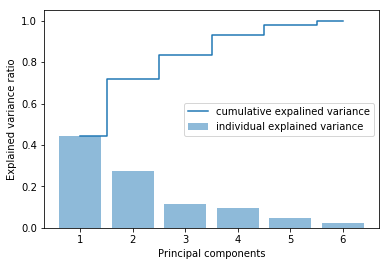

In [9]:
#data_fsに関してPCAを行い分散説明率の累積を確認=2つの主成分で７０％を超える
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
data_fs_pca = pca.fit_transform(data_fs)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()


In [10]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_fs)
data_pca = pca.transform(data_fs)
data_pca

array([[ -1.75098532e+00,  -7.05152286e-02],
       [ -1.80036534e+00,  -8.69753573e-01],
       [ -1.89373597e+00,  -1.67662072e+00],
       [  1.12731297e+00,  -1.45798229e+00],
       [ -7.96711467e-01,  -2.46086569e+00],
       [ -1.08382370e+00,  -3.92942430e-01],
       [ -1.13261002e+00,   2.01601862e-01],
       [ -1.58247377e+00,  -9.68196420e-01],
       [ -8.71825215e-01,   5.96758895e-01],
       [ -2.88888315e+00,  -7.41102520e-01],
       [ -2.11616786e+00,  -7.48845431e-01],
       [  9.91451442e-01,  -6.27014670e-02],
       [ -2.23259521e+00,  -1.32782770e+00],
       [ -1.90404777e+00,  -1.33385723e+00],
       [ -2.33337847e+00,  -9.83570924e-01],
       [  4.17284069e-01,   8.14298928e-01],
       [ -2.80513630e+00,   1.95322632e+00],
       [  2.52569663e-01,  -6.04494310e-01],
       [ -1.40226890e+00,  -1.86546557e+00],
       [ -1.01598970e+00,   4.15101430e-01],
       [ -8.36133270e-01,  -1.14744897e+00],
       [  1.72471835e+00,   1.47340654e-01],
       [ -

何故PCAが必要なのか
特徴量の個数を減らすことにより、次元の呪い（過学習）対策や計算量の削減を行うため。２次元や３次元にまで次元を削減できれば人間が視覚的に認識しやすいというメリットも有る。

クラスタリングとは
正解ラベルが与えられていない漠然としたデータしか持っていないときに、データを自然な何個かのまとまりに分類するために用いる。
階層的手法・非階層的手法
階層的手法：最も距離 (類似度) が近くて似ている組み合わせからまとめていくという方法。距離の定義の仕方によって様々な手法が有る。（最長距離法、最短距離法、最小分散法、重み付き平均法など）
非階層的手法：いくつのクラスターに分けるかあらかじめ決め，決めたクラスター数になるようにまとめていく手法。
事前にどうわけるかが用意されている教師学習のクラス分類とは違い、クラスタリングでは何なのかよくわからないものを自然な分け方で分類するという違いがある。


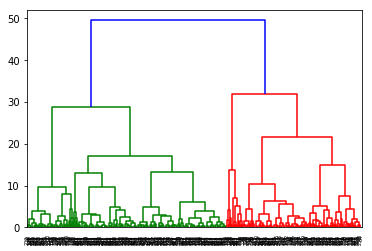

In [11]:
#樹形図を書く(ward法)
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

row_clusters = linkage(pdist(data_pca, metric='euclidean'), method='ward')
row_dender = dendrogram(row_clusters)
plt.show()

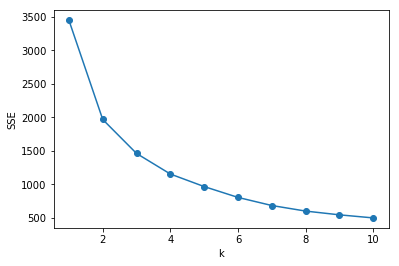

In [12]:
#Kの数を考える=２か３が良さげ
from sklearn.cluster import KMeans
SSE = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(data_pca)
    SSE.append(km.inertia_)

plt.plot(range(1,11), SSE, marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

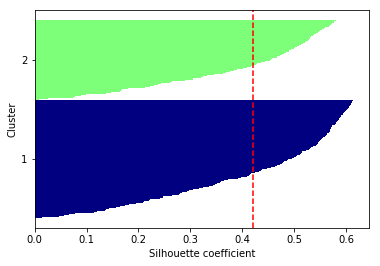

In [13]:
#シルエット分析　２つに分けてみる
km = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(data_pca)
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import numpy as np
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(data_pca, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

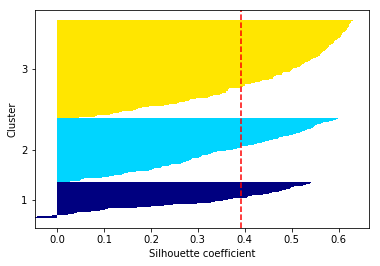

In [14]:
#シルエット分析　３つに分けてみる
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(data_pca)
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import numpy as np
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(data_pca, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

上記エルボー法とシルエット法の結果を見ることで、２つに分けるのが最も自然であると考えられるため、今回は２つに分けることとする。

In [15]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(data_pca)
print(y_km)

[1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0
 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0
 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1
 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0]


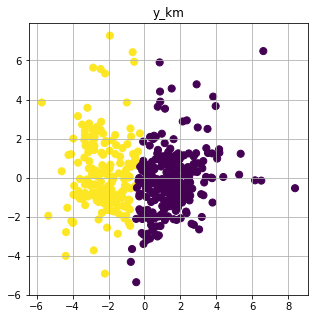

array([[ 1.49702975, -0.16548419],
       [-2.22440014,  0.24588894]])

In [16]:
plt.figure(figsize =(5,5))
plt.title('y_km')
plt.scatter(data_pca[:,0], data_pca[:,1], c=y_km , marker='o', s=50)
plt.grid()
plt.show()
km.cluster_centers_

In [17]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(data_pca)
print(y_km)

[1 1 1 2 1 1 1 1 0 1 1 2 1 1 1 2 0 2 1 1 1 2 1 1 1 0 2 2 1 2 1 2 2 2 2 0 1
 1 0 2 1 1 0 0 0 1 1 1 1 1 2 0 1 0 2 1 1 0 2 0 0 1 1 1 2 0 0 1 1 2 2 1 2 1
 1 2 2 1 2 0 2 0 1 2 1 1 1 1 2 1 2 2 1 2 0 0 0 2 2 2 1 1 1 1 2 2 0 1 0 0 2
 1 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 0 2 2 2 2 2 2 2 1 0 2 2 1 2 2 2 2 1 2 2
 2 2 2 2 2 2 2 0 1 2 1 0 0 2 2 1 1 1 1 0 2 2 0 0 0 0 2 0 1 2 2 2 1 1 0 1 0
 2 2 0 1 0 2 2 2 0 2 2 1 1 2 2 1 1 1 0 2 0 2 0 0 1 2 1 2 1 0 1 0 2 0 2 2 0
 2 2 2 2 1 2 0 2 1 0 2 0 2 0 2 2 2 1 2 2 2 1 1 0 2 2 2 2 2 1 2 1 1 2 2 1 1
 1 2 2 2 0 0 1 0 2 1 2 2 2 2 2 2 2 1 2 2 1 2 1 1 2 1 2 2 2 2 2 2 2 2 1 1 0
 2 1 1 0 1 0 0 0 0 0 1 2 2 0 2 2 0 2 2 1 2 0 2 1 2 2 2 1 2 1 2 2 2 2 2 1 2
 0 2 1 2 2 2 2 0 1 0 0 2 0 1 1 2 1 2 1 2 0 1 0 2 0 1 2 2 2 2 0 2 1 2 2 2 2
 1 2 2 1 2 2 1 2 2 0 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1
 1 1 1 1 2 0 1 2 1 1 0 0 1 0 1 2 1 1 2 1 1 2 2 2 1 2 2 1 1 2 1 2 0]


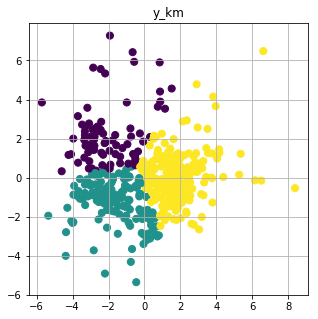

In [18]:
plt.figure(figsize =(5,5))
plt.title('y_km')
plt.scatter(data_pca[:,0], data_pca[:,1], c=y_km , marker='o', s=50)
plt.grid()
plt.show()

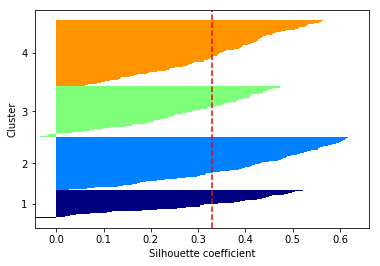

In [19]:
#シルエット分析　4つに分けてみる
km = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(data_pca)
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import numpy as np
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(data_pca, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

In [20]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(data_pca)
print(y_km)

[1 1 1 3 3 1 1 1 1 1 1 3 1 1 1 2 0 3 1 1 1 2 3 1 1 0 3 2 1 3 1 3 3 3 2 0 3
 1 0 3 3 1 0 0 0 1 1 1 1 1 3 0 1 0 3 1 1 0 2 1 0 1 1 1 3 0 0 1 3 2 3 1 3 3
 1 2 3 1 2 1 2 0 1 3 1 1 1 3 2 3 2 3 1 3 0 0 0 2 2 2 1 1 1 3 3 3 0 1 0 0 3
 1 3 3 3 2 2 3 3 3 3 2 2 1 3 3 3 1 0 3 3 2 3 2 2 2 1 0 3 3 3 3 2 3 2 1 2 3
 2 3 2 2 2 3 2 1 1 3 1 0 1 2 3 1 1 1 1 0 2 2 0 0 0 0 2 0 3 3 3 3 1 1 0 3 0
 2 2 0 1 0 2 2 2 0 2 3 3 1 3 2 1 1 3 0 2 0 2 0 1 1 3 1 2 1 1 1 0 3 0 2 2 0
 2 3 2 3 1 2 2 3 3 1 3 0 3 0 2 2 2 3 3 3 3 1 1 1 3 2 3 3 2 1 3 3 1 2 3 3 3
 3 3 2 3 1 0 1 1 3 1 2 2 2 2 3 2 2 3 2 3 1 2 1 3 3 3 2 2 3 2 2 3 3 3 1 3 0
 3 1 1 2 1 1 0 0 0 0 1 3 2 1 3 3 0 2 3 1 2 0 2 1 2 3 3 3 3 3 2 2 3 3 3 1 3
 1 3 1 2 3 2 3 0 1 0 0 2 0 1 1 3 1 2 1 2 0 3 2 2 0 3 2 3 2 2 0 2 1 2 2 2 2
 3 3 3 1 2 2 1 3 2 0 3 3 1 2 3 2 2 3 2 2 2 2 2 3 2 2 1 2 2 2 2 3 2 3 3 2 3
 1 1 1 3 3 0 3 3 1 1 1 0 3 0 1 3 3 1 3 1 3 3 2 3 3 3 2 1 3 3 1 3 0]


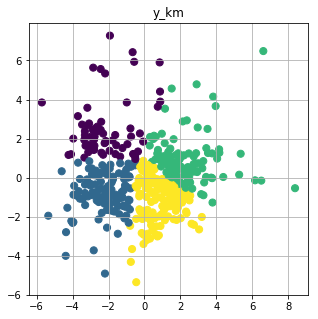

In [25]:
plt.figure(figsize =(5,5))
plt.title('y_km')
plt.scatter(data_pca[:,0], data_pca[:,1], c=y_km , marker='o', s=50)
plt.grid()
plt.show()

In [48]:
data = pd.read_csv("/Users/se-ji/customersdata.csv")
Channel=data["Channel"]
Region=data["Region"]

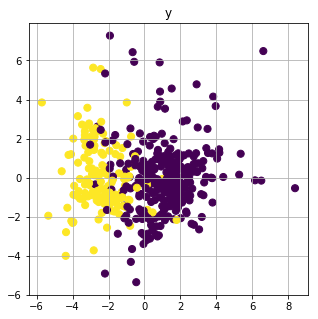

In [49]:
#既知のグループとの比較 (Channel)
data_original = data.copy()
plt.figure(figsize =(5,5))
plt.title('y')
plt.scatter(data_pca[:,0], data_pca[:,1], c=Channel , marker='o', s=50)
plt.grid()
plt.show()

In [50]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(data_pca)

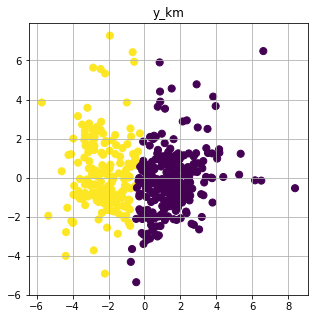

array([[ 1.49702975, -0.16548419],
       [-2.22440014,  0.24588894]])

In [51]:
#PCAを用いた分類（２つ）
plt.figure(figsize =(5,5))
plt.title('y_km')
plt.scatter(data_pca[:,0], data_pca[:,1], c=y_km , marker='o', s=50)
plt.grid()
plt.show()
km.cluster_centers_

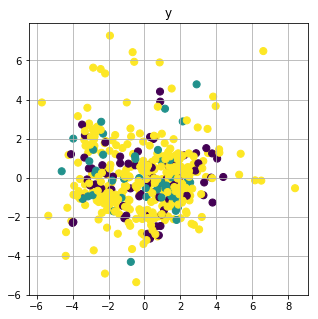

In [53]:
Region=data["Region"]
#既知のグループとの比較 (Region)
data_original = data.copy()
plt.figure(figsize =(5,5))
plt.title('y')
plt.scatter(data_pca[:,0], data_pca[:,1], c=Region , marker='o', s=50)
plt.grid()
plt.show()

In [54]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(data_pca)

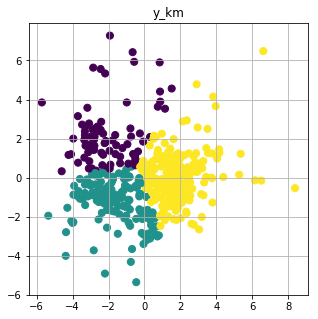

array([[-2.0032756 ,  2.20036118],
       [-1.59753157, -1.2798291 ],
       [ 1.77574097,  0.02617815]])

In [55]:
#PCAを用いた分類（２つ）
plt.figure(figsize =(5,5))
plt.title('y_km')
plt.scatter(data_pca[:,0], data_pca[:,1], c=y_km , marker='o', s=50)
plt.grid()
plt.show()
km.cluster_centers_

既知のグループとの比較とクラスターの特徴
・Channel
チャンネルに関しては、PCAで次元削減したクラスター分類と似たような分け方になっている。そのため、チャンネル（今回の場合はホテルやレストランと小売店では購買したプロダクトに違いが有る）
・Region
一方リージョンでは、PCAで次元削減したクラスター分類とは異なるような分け方になっているため、地域によってプロダクトの購買に差がないことがわかる。